In [55]:
N = 200
ntrees = 100
sample_size = 160
seed = 42

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import h2o
import math
import random
from h2o.estimators import H2OIsolationForestEstimator, H2OExtendedIsolationForestEstimator
from sklearn.datasets import make_blobs

In [57]:
#conda install -c conda-forge h2o-py openjdk -y

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,38 mins 34 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_minjoo_5anrar
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.955 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"



On Training Data:
0.91

On Test Data:
0.92


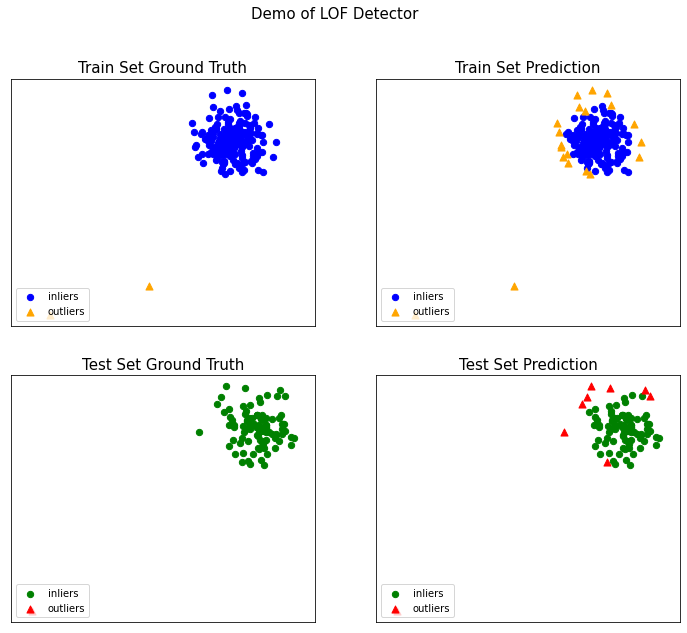

In [61]:

from __future__ import division
from __future__ import print_function

import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from joblib import dump, load

if __name__ == "__main__":
    contamination = 0.01  # percentage of outliers (the number of outliers in train(correct answer)=20)
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)
    
    
    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    

from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 


On Training Data:
0.91

On Test Data:
0.85


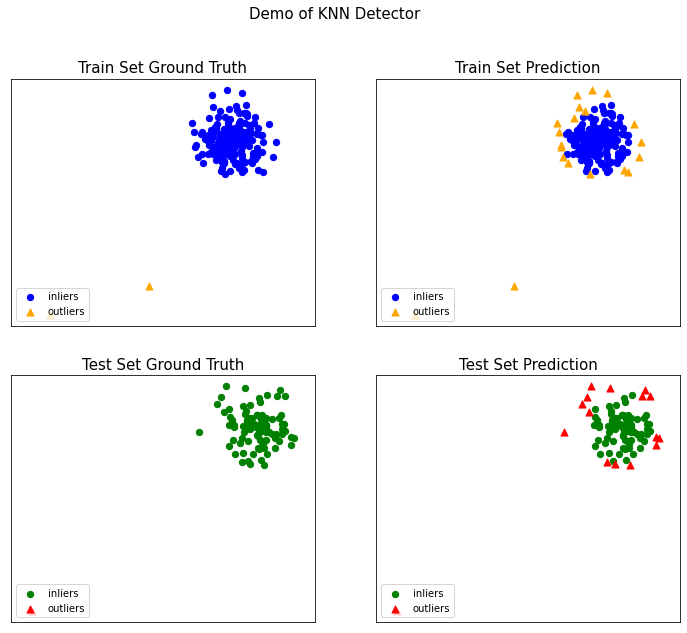

In [62]:


# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.knn import KNN


from joblib import dump, load

if __name__ == "__main__":
    
    # train LOF detector
    clf_name = 'KNN'
    clf = KNN()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='KNN'
    clf = KNN()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    

from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 


On Training Data:
0.91

On Test Data:
0.83


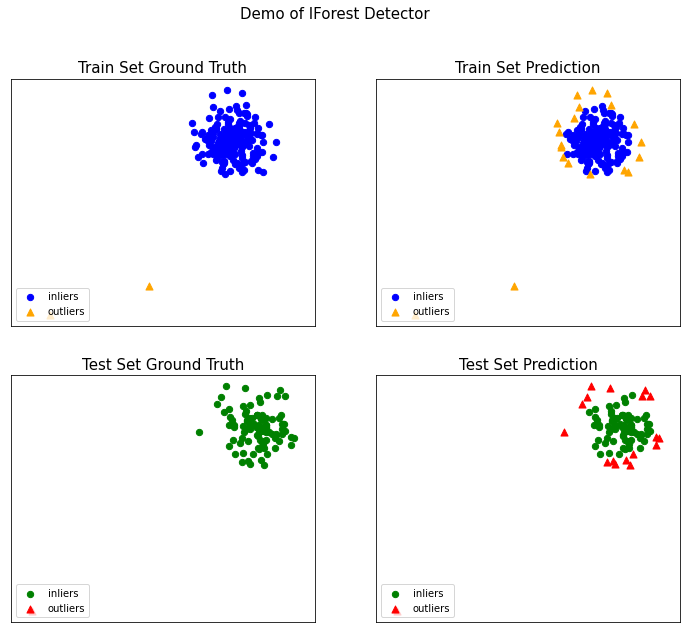

In [63]:


# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.iforest import IForest


from joblib import dump, load

if __name__ == "__main__":
    
    # train LOF detector
    clf_name = 'IForest'
    clf = IForest()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    # save the model
    dump(clf, 'clf.joblib')
    # load the model
    clf = load('clf.joblib')

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
   
    
   # evaluate and print the results
    clf_name='IForest'
    clf = IForest()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    train_accuracy=np.sum(y_train== y_train_pred )/len(y_train)
    print(train_accuracy)

    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    test_accuracy=np.sum(y_test== y_test_pred )/len(y_test)
    print(test_accuracy)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)
    

from joblib import dump, load

# save the model
dump(clf, 'clf.joblib')
# load the model
clf = load('clf.joblib')
 

In [64]:
data=X_train

training_frame = h2o.H2OFrame(data,column_names = ["x", "y"])
print(training_frame)
EIF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = "extended_isolation_forest.hex",
                                              ntrees = ntrees, 
                                              sample_size = sample_size,
                                              extension_level = 1,
                                              seed = seed
                                             )
print("EIF_h2o :",EIF_h2o)

EIF_h2o.train(training_frame = training_frame)

IF_h2o = H2OExtendedIsolationForestEstimator(
                                              model_id = "isolation_forest.hex",
                                              ntrees = ntrees, 
                                              sample_size = sample_size,
                                              extension_level = 0,
                                              seed = seed
                                             )
IF_h2o.train(training_frame = training_frame)

#print(EIF_h2o)
#print(IF_h2o)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
      x        y
6.43366  5.50917
5.0447   7.70806
5.92454  5.25922
5.29399  5.67126
5.61509  6.13093
6.1859   6.09411
7.16631  7.22719
4.05471  6.48127
5.79978  5.86931
4.82256  7.18593
[200 rows x 2 columns]

EIF_h2o : No model available
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%


,number_of_trees,size_of_subsample,extension_level,seed,number_of_trained_trees,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves,min_isolated_point,max_isolated_point,mean_isolated_point,min_not_isolated_point,max_not_isolated_point,mean_not_isolated_point,min_zero_splits,max_zero_splits,mean_zero_splits
,100,160,0,42.0,100.0,7.0,7.0,7.0,12.0,68.0,35.82,8.0,45.0,22.05,115.0,152.0,137.95,0.0,3.0,0.11


y_train : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1.]
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%

On Training Data:
# train error 13
0.935

On Test Data:
0.86


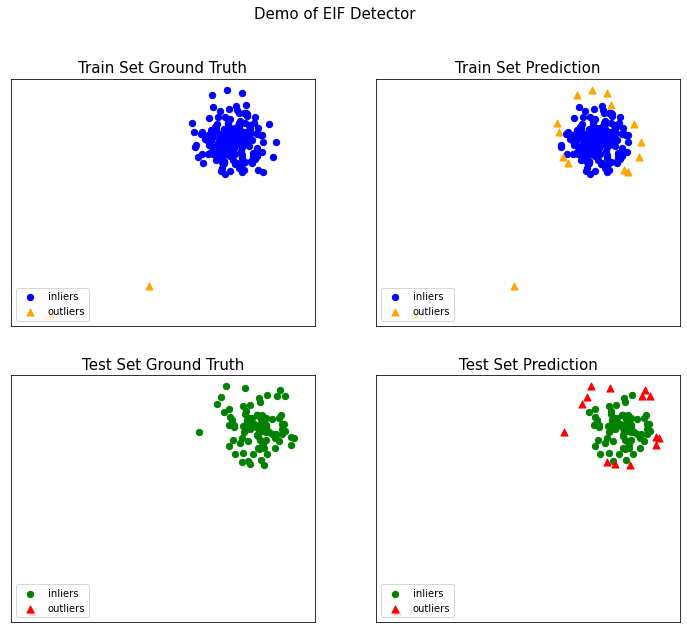

In [65]:
threshold=0.46
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((200,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)

In [ ]:
#this threshold better
threshold=0.48
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((200,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)

y_train : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1.]
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [ ]:
#little bit overfitted
threshold=0.5
print("y_train :",y_train)
y_train_pred2=EIF_h2o.predict(training_frame)['anomaly_score']
y_train_pred2[y_train_pred2>threshold] = 1
y_train_pred2[y_train_pred2<=threshold] = 0

y_train_pred2=np.array(y_train_pred2.as_data_frame(use_pandas=True, header=True)).reshape((200,))

testing_frame2 = h2o.H2OFrame(X_test,column_names = ["x", "y"])
y_test_pred2=EIF_h2o.predict(testing_frame2)['anomaly_score']
y_test_pred2[y_test_pred2>threshold] = 1
y_test_pred2[y_test_pred2<=threshold] = 0

y_test_pred2=np.array(y_test_pred2.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='EIF'
y_test_scores = clf.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("#train error",np.sum(y_train!= y_train_pred2))
EIF_train_accuracy=np.sum(y_train== y_train_pred2)/len(y_train)
print(EIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

EIF_test_accuracy=np.sum(y_test== y_test_pred2)/len(y_test)
print(EIF_test_accuracy)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred2,
              y_test_pred2, show_figure=True, save_figure=False)

In [ ]:
import pandas as pd
import numpy as np
from difmain.algorithms.dif import DIF
model_configs = {'n_ensemble':50, 'n_estimators':6}
data_tst = np.c_[X_train, y_train]
print(data_tst)

In [ ]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.28
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)

In [ ]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.30
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)

In [ ]:
start_time = datetime.now()

dif = DIF(**model_configs)
dif.fit(X_train)


threshold=0.32
print("y_train :",y_train)
y_train_pred3=dif.decision_function(X_train)
y_train_pred3[y_train_pred3>threshold] = 1
y_train_pred3[y_train_pred3<=threshold] = 0

#y_train_pred3=np.array(y_train_pred3.as_data_frame(use_pandas=True, header=True)).reshape((200,))

#testing_frame3 = dif.decision_function(X_test)
y_test_pred3=dif.decision_function(X_test)
y_test_pred3[y_test_pred3>threshold] = 1
y_test_pred3[y_test_pred3<=threshold] = 0

#y_test_pred3=np.array(y_test_pred3.as_data_frame(use_pandas=True, header=True)).reshape((100,))

# evaluate and print the results
clf_name='DIF'
y_test_scores = dif.decision_function(X_test)
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_pred2)
print("# train error",np.sum(y_train!= y_train_pred3))
DIF_train_accuracy=np.sum(y_train== y_train_pred3)/len(y_train)
print(DIF_train_accuracy)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_pred2)

DIF_test_accuracy=np.sum(y_test== y_test_pred3)/len(y_test)
print(DIF_test_accuracy)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred3,
              y_test_pred3, show_figure=True, save_figure=False)